# Analysis of water allocation results
Considering all demands as exogenous and climate independent, we explore the solution of the water allocation problem in function of the runoff conditions.

### Assumptions
All demands are exogenous and set to the 2010 estimates by USGS at the county-scale. 
Within each county, water demands are met using several sources conjunctively: surface water, groundwater or by importing water from a supersource.
The optimization finds the optimal solution in terms of cost, surface water being considered as the cheapest option, followed by groundwater, then importation. The optimization is performed for two timesteps of 6 months. Several runs are performed each with a different climate.

## Case 1: optimization without reservoir

In [28]:
include("../analysis/analysis_conjunctive.jl");

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.

Loading from saved region network...
Loading from saved water network...


Optimize a model with 68238 rows, 112306 columns and 4044378 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e-01, 1e+03]
  Bounds range    [0e+00, 0e+00]
  RHS range       [4e-02, 5e+06]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 16528 rows and 20567 columns
Presolve time: 1.73s
Presolved: 51710 rows, 91739 columns, 3586900 nonzeros

Ordering time: 4.85s

Barrier statistics:
 AA' NZ     : 4.708e+06
 Factor NZ  : 3.282e+07 (roughly 300 MBytes of memory)
 Factor Ops : 1.035e+11 (roughly 4 seconds per iteration)
 Threads    : 1

Barrier performed 0 iterations in 13.51 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 32292 iterations and 13.77 seconds
Optimal objective  5.483363160e+07
 14.142333 seconds (475.85 k allocations: 169.625 MB, 0.75% gc time)
supersourcesupply
All zero.
withdrawals
[76802.9856,0.0,28630.982105894487,0.0,0.0,0.0,0.

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...


Running model...
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoi

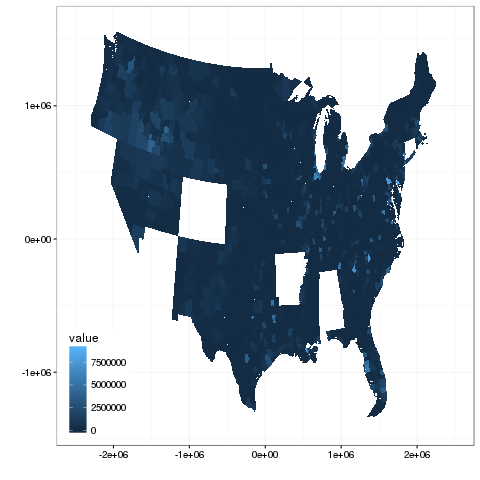

RCall.RObject{RCall.VecSxp}


In [35]:
include("../src/mapping.jl")
mapdata(:Allocation, :waterallocated, "sum")

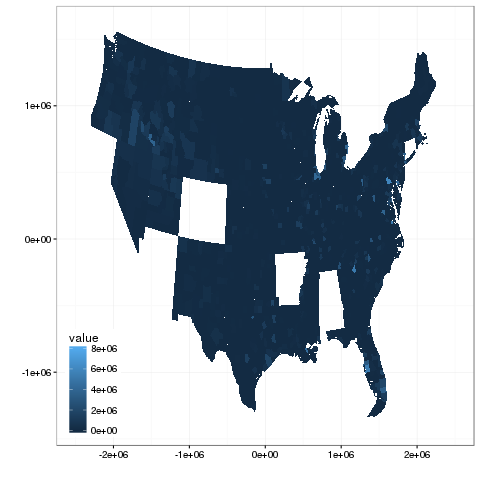

RCall.RObject{RCall.VecSxp}


In [36]:
mapdata(:Allocation, :swsupply,"sum")

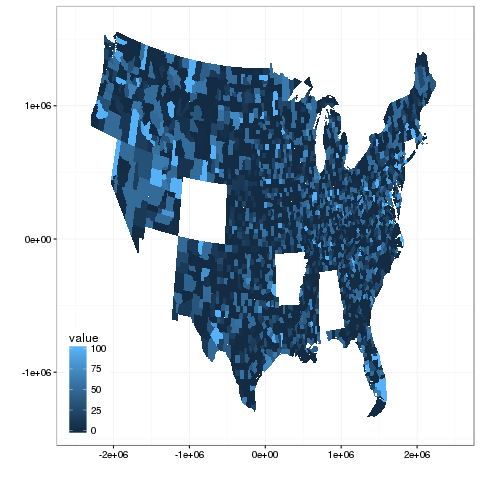

RCall.RObject{RCall.VecSxp}


In [44]:
percentorigin = 100*sum(getdata(:Allocation, :swsupply),2)./sum(getdata(:Allocation, :waterallocated),2);
mapdata(percentorigin)

Above is plotted to what percentage are the counties demands met by surface water. The obtained map show values ranging from 0 to 100% with no geographic specificities. The current optimization problem works with prices by source that are national. Regional variations would help constrain the model. 

#### Groundwater
##### Water abstracted from the subsurface

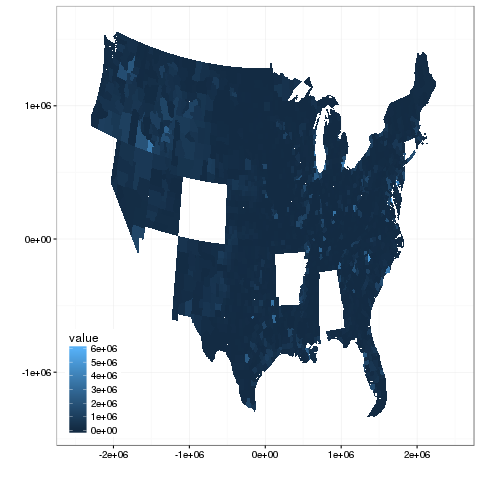

RCall.RObject{RCall.VecSxp}


In [32]:
mapdata(:Allocation, :waterfromgw,"sum")

The rest of the water demand is provided by groundwater extraction.

##### Drawdown

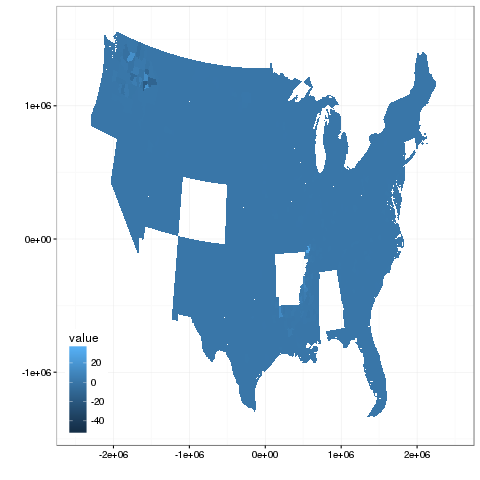

RCall.RObject{RCall.VecSxp}


In [33]:
mapdata(getdata(:Aquifer, :piezohead0)-getdata(:Aquifer, :piezohead)[:,numsteps])

Huge fluctuations are taking place in the Columbian Plateau aquifer. More investigations are needed to understand what stems from the head initialisation and what is specific to human use.

### With reservoir management

In [45]:
include("../analysis/analysis_conjunctive.jl")

┌──────────────────────────────────────────────────┐
│    ▄▄    ▄▄      ▄▄    ▄▄       ▄▄▄▄    ▄▄    ▄▄ │
│   ████   ██      ██   ████    ▄█▀▀▀▀█   ██    ██ │
│   ████   ▀█▄ ██ ▄█▀   ████    ██▄       ██    ██ │
│  ██  ██   ██ ██ ██   ██  ██    ▀████▄   ████████ │
│  ██████   ███▀▀███   ██████        ▀██  ██    ██ │
│ ▄██  ██▄  ███  ███  ▄██  ██▄  █▄▄▄▄▄█▀  ██    ██ │
│ ▀▀    ▀▀  ▀▀▀  ▀▀▀  ▀▀    ▀▀   ▀▀▀▀▀    ▀▀    ▀▀ │
└──────────────────────────────────────────────────┘

Welcome to AWASH, the America's Water Model, version 0.7.

Loading from saved region network...
Loading from saved water network...


Optimize a model with 68238 rows, 112306 columns and 4044378 nonzeros
Coefficient statistics:
  Matrix range    [1e+00, 1e+00]
  Objective range [1e-01, 1e+03]
  Bounds range    [0e+00, 0e+00]
  RHS range       [4e-02, 7e+10]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 15906 rows and 17614 columns
Presolve time: 2.43s
Presolved: 52332 rows, 95130 columns, 3641576 nonzeros

Elapsed ordering time = 5s
Elapsed ordering time = 6s
Elapsed ordering time = 6s
Elapsed ordering time = 7s
Ordering time: 6.56s

Barrier performed 0 iterations in 10.13 seconds
Barrier solve interrupted - model solved by another algorithm


Solved with dual simplex
Solved in 30077 iterations and 10.42 seconds
Optimal objective  5.423470981e+06
 10.820184 seconds (475.85 k allocations: 169.625 MB, 1.11% gc time)
supersourcesupply
All zero.
withdrawals
[76802.9856,0.0,0.0,0.0,0.0,0.0,88983.62112000001,0.0,0.0,0.0,0.0,15277.6416,4030.6336189381973,0.0,0.0,0.0,0.0,0.0

Loading from saved region network...
Loading from saved water network...
Loading from saved region network...


Creating model...


Running model...
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoir.2696
Missing canal.02248600
Missing reservoir.2684
Missing reservoir.737
Missing usgs.03337000
Missing usgs.01396580
Missing usgs.01403535
Missing usgs.01356190
Missing usgs.01446775
Missing usgs.01432000
Missing usgs.03433640
Missing canal.08437600
Missing usgs.09277800
Missing canal.10170700
Missing reservoir.1286
Missing usgs.01659000
Missing usgs.12396900
Missing usgs.12181100
Missing canal.0208463140
Missing canal.02280500
Missing canal.02280500
Missing canal.09475501
Missing canal.09475501
Missing canal.09522701
Missing usgs.11230500
Missing usgs.11075720
Missing usgs.11075720
Missing usgs.11063000
Missing usgs.11063000
Missing usgs.11413320
Missing reservoir.1894
Missing canal.02248600
Missing reservoi

RCall.RObject{RCall.NilSxp}
NULL


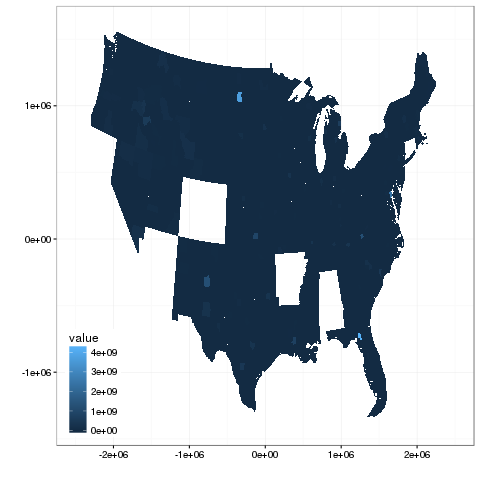

RCall.RObject{RCall.VecSxp}


In [46]:
include("../src/mapping.jl")
mapdata(:Allocation, :waterallocated, "sum")

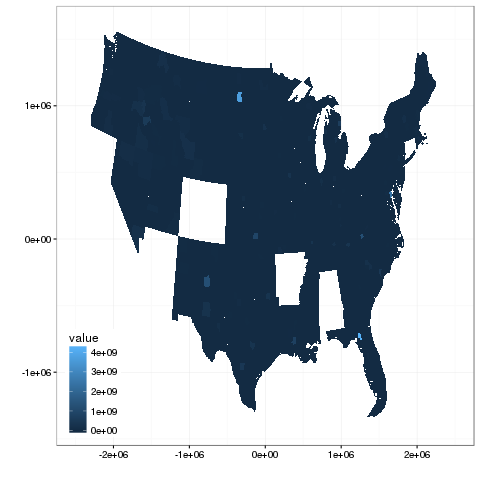

RCall.RObject{RCall.VecSxp}


In [47]:
mapdata(:Allocation, :swsupply,"sum")

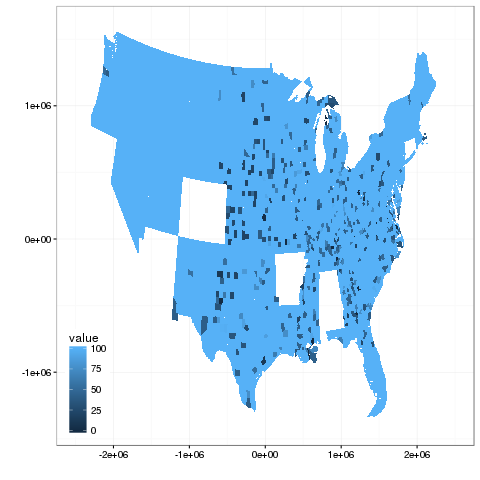

RCall.RObject{RCall.VecSxp}


In [48]:
percentorigin = 100*sum(getdata(:Allocation, :swsupply),2)./sum(getdata(:Allocation, :waterallocated),2);
mapdata(percentorigin)

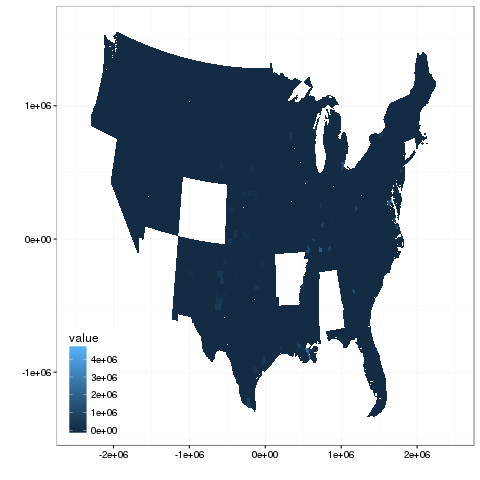

RCall.RObject{RCall.VecSxp}


In [49]:
mapdata(:Allocation, :waterfromgw,"sum")

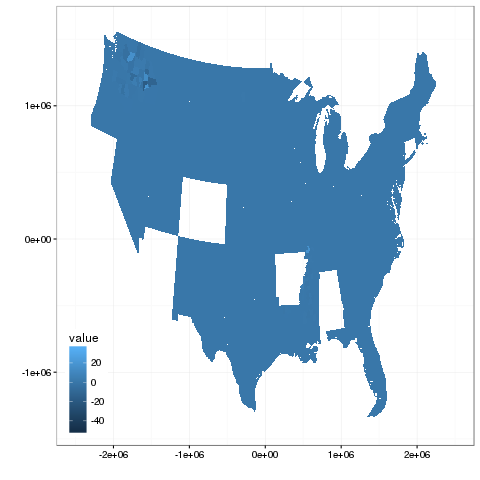

RCall.RObject{RCall.VecSxp}


In [50]:
mapdata(getdata(:Aquifer, :piezohead0)-getdata(:Aquifer, :piezohead)[:,numsteps])